<a href="https://colab.research.google.com/github/IagoMagalhaes23/Detector-de-Mascara/blob/main/Detector_de_Mascara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usando Machine Learning para reconhecer máscaras

##Importando bibliotecas

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import files

##Upload dos arquivos

In [4]:
importar = files.upload()
print(*importar, sep="\n")

Saving 242073123_412416063578972_525852574388148857_n.jpg to 242073123_412416063578972_525852574388148857_n.jpg
242073123_412416063578972_525852574388148857_n.jpg


##Lendo imagem com OpenCV

In [5]:
imagem = cv.imread("242073123_412416063578972_525852574388148857_n.jpg")

In [6]:
type(imagem)

numpy.ndarray

##Mostrando imagem

In [7]:
def mostrar_imagem(imagem):
  imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  plt.imshow(imagem_rgb)

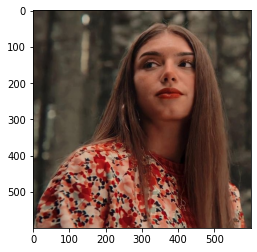

In [8]:
mostrar_imagem(imagem)

##Pré-processamento da imagem

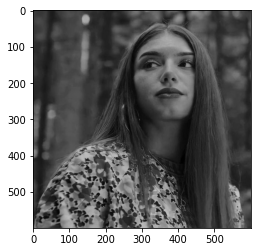

In [9]:
imagemgray = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)
mostrar_imagem(imagemgray)

##Utilizando CascadeClassifier

In [18]:
classificador = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [19]:
faces = classificador.detectMultiScale(imagemgray)

In [20]:
imagem_copia = np.array(imagem)

In [21]:
for x,y,w,h in faces:
  cv.rectangle(imagem_copia, (x,y), (x+w, y+h), (0,255,0), 2)

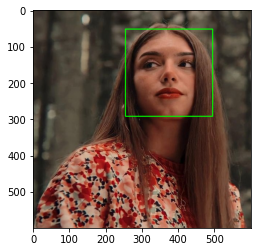

In [22]:
mostrar_imagem(imagem_copia)

##Recortando e padronizando imagens com o OpenCV

In [23]:
imagens_cortadas = list()

In [24]:
for x,y,w,h in faces:
  face = imagem[y:y+h, x:x+w]
  face = cv.resize(face, (160,160))
  imagens_cortadas.append(face)

In [25]:
len(imagens_cortadas)

1

In [26]:
for img in imagens_cortadas:
  print(img.shape)

(160, 160, 3)


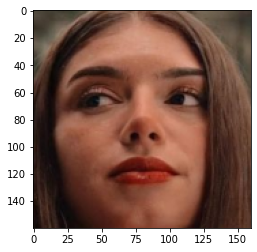

In [27]:
mostrar_imagem(imagens_cortadas[0])

##Salvando conjunto de dados

In [28]:
def salvar_imagens(imagens, caminho):
  if not os.path.exists(caminho):
    os.mkdir(caminho)
  index = len(os.listdir(caminho))
  for imagem in imagens:
    cv.write(f"{caminho}/{index}.jpg", imagem)
    index += 1

##Modelo de ML

In [31]:
import cv2 as cv
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [65]:
def carrega_dataframe():
  dados = {
      "ARQUIVO": [],
      "ROTULO": [],
      "ALVO": []
  }

  caminho_com_mascara = "/content/drive/MyDrive/imagens/maskon"
  caminho_sem_mascara = "/content/drive/MyDrive/imagens/maskoff"

  com_mascara = os.listdir(caminho_com_mascara)
  sem_mascara = os.listdir(caminho_sem_mascara)

  for arquivo in com_mascara:
    dados["ARQUIVO"].append(f"{caminho_com_mascara}{os.sep}{arquivo}")
    dados["ROTULO"].append(f"Com mascara")
    dados["ALVO"].append(1)

  for arquivo in sem_mascara:
    dados["ARQUIVO"].append(f"{caminho_sem_mascara}{os.sep}{arquivo}")
    dados["ROTULO"].append(f"Sem mascara")
    dados["ALVO"].append(0)

  dataframe = pd.DataFrame(dados)

  return dataframe

In [66]:
dados = carrega_dataframe()

dados.to_csv("/content/drive/MyDrive/imagens/img_df.csv")

dados = pd.read_csv("/content/drive/MyDrive/imagens/img_df.csv")

dados.head()

,Unnamed: 0,ARQUIVO,ROTULO,ALVO
0,0,/content/drive/MyDrive/imagens/maskon/0.jpg,Com mascara,1
1,1,/content/drive/MyDrive/imagens/maskon/143.jpg,Com mascara,1
2,2,/content/drive/MyDrive/imagens/maskon/142.jpg,Com mascara,1
3,3,/content/drive/MyDrive/imagens/maskon/137.jpg,Com mascara,1
4,4,/content/drive/MyDrive/imagens/maskon/138.jpg,Com mascara,1


In [67]:
def ler_imagens(dados):
  arquivos = dados["ARQUIVO"]
  imagens = list()

  for arquivo in arquivos:
    img = cv.cvtColor(cv.imread(arquivo), cv.COLOR_BGR2GRAY).flatten()
    imagens.append(img)
  
  dados["IMAGEM"] = imagens

In [68]:
ler_imagens(dados)

In [69]:
dados.head()

,Unnamed: 0,ARQUIVO,ROTULO,ALVO,IMAGEM
0,0,/content/drive/MyDrive/imagens/maskon/0.jpg,Com mascara,1,"[158, 178, 160, 173, 165, 172, 168, 149, 155, ..."
1,1,/content/drive/MyDrive/imagens/maskon/143.jpg,Com mascara,1,"[182, 182, 182, 181, 181, 181, 181, 181, 183, ..."
2,2,/content/drive/MyDrive/imagens/maskon/142.jpg,Com mascara,1,"[249, 250, 247, 237, 239, 217, 164, 166, 137, ..."
3,3,/content/drive/MyDrive/imagens/maskon/137.jpg,Com mascara,1,"[254, 254, 254, 254, 254, 254, 255, 255, 255, ..."
4,4,/content/drive/MyDrive/imagens/maskon/138.jpg,Com mascara,1,"[173, 176, 179, 170, 184, 172, 166, 156, 159, ..."


In [70]:
X = list(dados["IMAGEM"])
y = list(dados["ALVO"])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.99, random_state=13)

In [72]:
pca = PCA(n_components=30)
pca.fit(X_train)

PCA(n_components=30)

In [73]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [74]:
parametros = {
    "n_neighbors": [2, 3, 5, 11, 19, 23, 29],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattam", "cosine", "l1", "l2"]
}

knn = GridSearchCV(KNeighborsClassifier(), parametros)

knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattam', 'cosine', 'l1',
                                    'l2'],
                         'n_neighbors': [2, 3, 5, 11, 19, 23, 29],
                         'weights': ['uniform', 'distance']})

In [75]:
knn.score(X=X_test, y=y_test)

0.8461538461538461

In [76]:
predicao = knn.predict(X_test)

In [77]:
verdadeiros_positivos, falsos_positivos, falsos_negativos, verdadeiros_negativos = confusion_matrix(y_test, predicao).ravel()

In [78]:
verdadeiros_positivos, verdadeiros_negativos

(7, 4)

In [79]:
falsos_positivos, falsos_negativos

(1, 1)

In [80]:
importar = files.upload()
print(*importar, sep="\n")

Saving 242073123_412416063578972_525852574388148857_n.jpg to 242073123_412416063578972_525852574388148857_n (1).jpg
242073123_412416063578972_525852574388148857_n.jpg


In [84]:
classificador = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [88]:
def processa_imagem(pca, classificador, imagem):
  img = cv.imread(imagem)
  imagem_cinza = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  faces = classificador.detectMultiScale(img)
  vetores = list()
  cont = 0
  fig = plt.figure(figsize=(10,10))
  for x,y,w,h in faces:
    face_cortada = imagem_cinza[y:y+h, x:x+w]
    fig.add_subplot(3, 3, cont+1)
    plt.imshow(cv.cvtColor(face_cortada, cv.COLOR_BGR2RGB))
    cont+=1
    face_cortada = cv.resize(face_cortada, (160,160))
    vetor = face_cortada.flatten()
    vetores.append(vetor)
  plt.show()
  return vetores

In [89]:
classes = {
    0: "Sem máscara",
    1: "Com máscara"
}

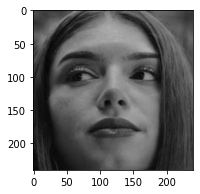

Sem máscara


In [90]:
vetores = processa_imagem(pca, classificador, "242073123_412416063578972_525852574388148857_n.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=' - ')